In [43]:
%run analyses/imports.py

In [44]:
# Raw data 관찰용

In [45]:
# 관찰할 데이터의 경로들을 등록
data_paths = [
    '/home/hwkang/dev-TSB-AD/TSB-AD/Datasets/TSB-AD-M/001_Genesis_id_1_Sensor_tr_4055_1st_15538.csv',
    #'/home/hwkang/dev-TSB-AD/TSB-AD/Datasets/TSB-AD-M/018_Daphnet_id_1_HumanActivity_tr_9693_1st_20732.csv',
    #'/home/hwkang/dev-TSB-AD/TSB-AD/Datasets/TSB-AD-M/115_PSM_id_1_Facility_tr_50000_1st_129872.csv',
    #'/home/hwkang/dev-TSB-AD/TSB-AD/Datasets/TSB-AD-M/137_CreditCard_id_1_Finance_tr_500_1st_541.csv',
    #'/home/hwkang/dev-TSB-AD/TSB-AD/Datasets/TSB-AD-M/173_GECCO_id_1_Sensor_tr_16165_1st_16265.csv',
    #'/home/hwkang/dev-TSB-AD/TSB-AD/Datasets/TSB-AD-M/007_MSL_id_6_Sensor_tr_980_1st_3550.csv',
    #'/home/hwkang/dev-TSB-AD/TSB-AD/Datasets/TSB-AD-M/008_MSL_id_7_Sensor_tr_656_1st_1630.csv',
    #'/home/hwkang/dev-TSB-AD/TSB-AD/Datasets/TSB-AD-M/015_MSL_id_14_Sensor_tr_575_1st_1250.csv',
    '/home/hwkang/dev-TSB-AD/TSB-AD/Datasets/TSB-AD-M/014_MSL_id_13_Sensor_tr_1525_1st_4575.csv'
]

In [ ]:
def plot_mts(data_path, explicit_start_idx=None):
    df = pd.read_csv(data_path)

    window_size = 1000
    length = df.shape[0]
    if length > 5000:
        anomaly_start_idx = data_path.split('.')[0].split('_')[-1]
        start_idx = int(anomaly_start_idx) - window_size // 2
        end_idx = start_idx + window_size
        if start_idx < 0:
            start_idx = 0
            end_idx = window_size
        elif end_idx > length:
            end_idx = length
            start_idx = end_idx - window_size

    if explicit_start_idx is not None:
        start_idx = explicit_start_idx
        end_idx = start_idx + window_size
        if end_idx > length:
            end_idx = length

    data = df.iloc[start_idx: end_idx, :-1].values
    label = df.iloc[start_idx: end_idx, -1].values

    num_cols = 2
    num_rows = (data.shape[1] + num_cols - 1) // num_cols  # Calculate number of rows needed
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 1.0 * num_rows), sharex=True, sharey=True)
    axes = axes.flatten() if num_rows > 1 else [axes]

    for i in range(data.shape[1]):
        axes[i].plot(data[:, i], label=f'Sensor {i+1}')
        #axes[i].set_title(f'Sensor {i+1}')
        #axes[i].legend()

        for t in range(len(label)):
            if label[t] == 1:
                axes[i].axvspan(t - 0.5, t + 0.5, color='red', alpha=0.2)

        row = i // num_cols
        col = i % num_cols

        # ✅ 첫 번째 열인 경우
        if col == 0:
            axes[i].set_ylabel("Value")

        # ✅ 마지막 행인 경우
        if row == num_rows - 1:
            axes[i].set_xlabel("Time")

    # turn off unused subplots
    for j in range(data.shape[1], len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()

Plotting data from: /home/hwkang/dev-TSB-AD/TSB-AD/Datasets/TSB-AD-M/001_Genesis_id_1_Sensor_tr_4055_1st_15538.csv


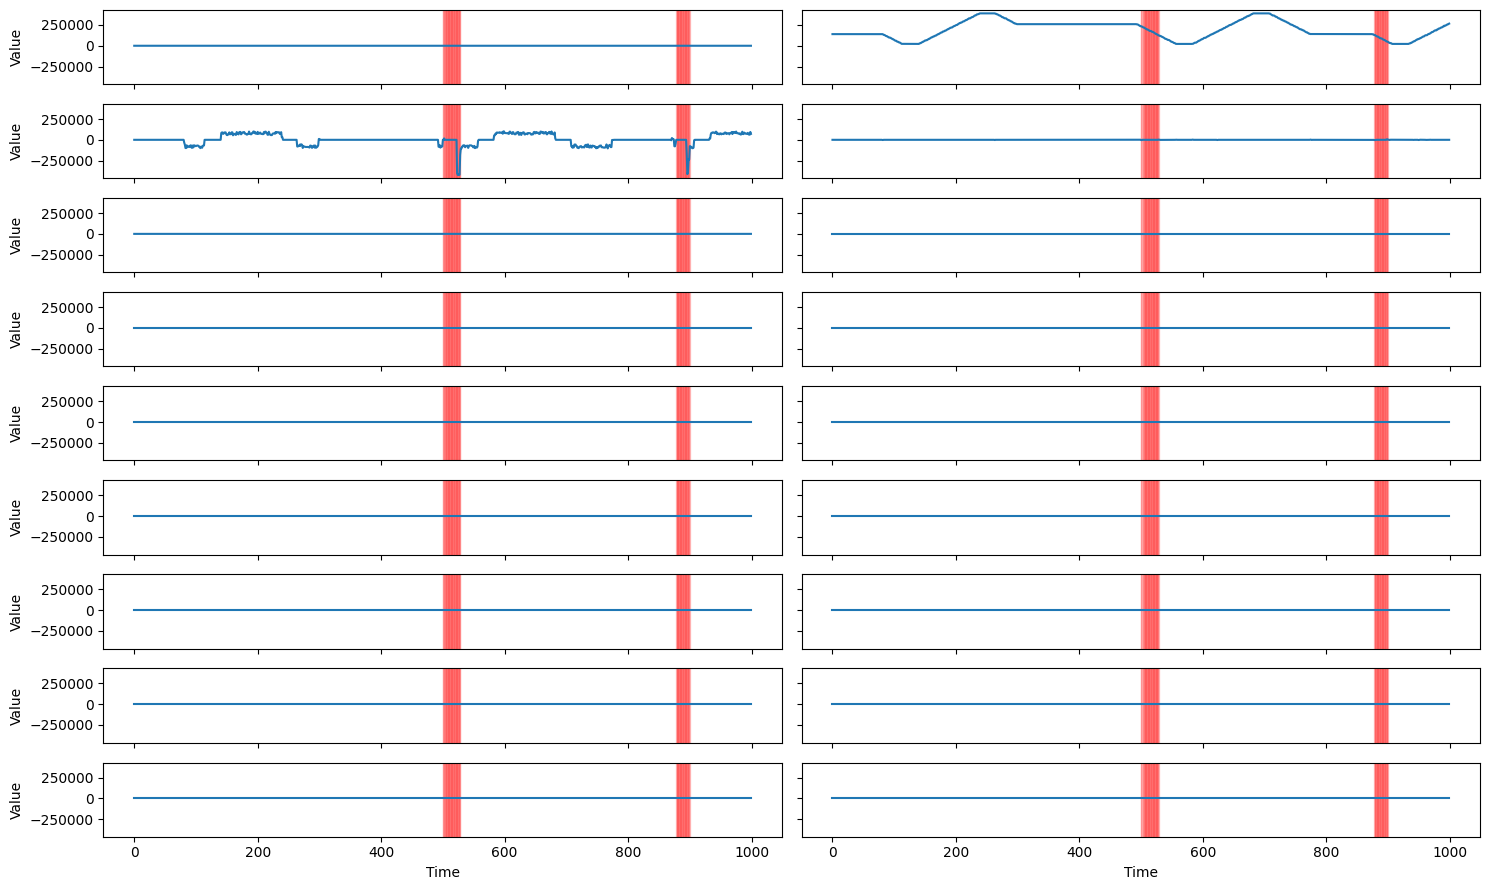

Plotting data from: /home/hwkang/dev-TSB-AD/TSB-AD/Datasets/TSB-AD-M/014_MSL_id_13_Sensor_tr_1525_1st_4575.csv


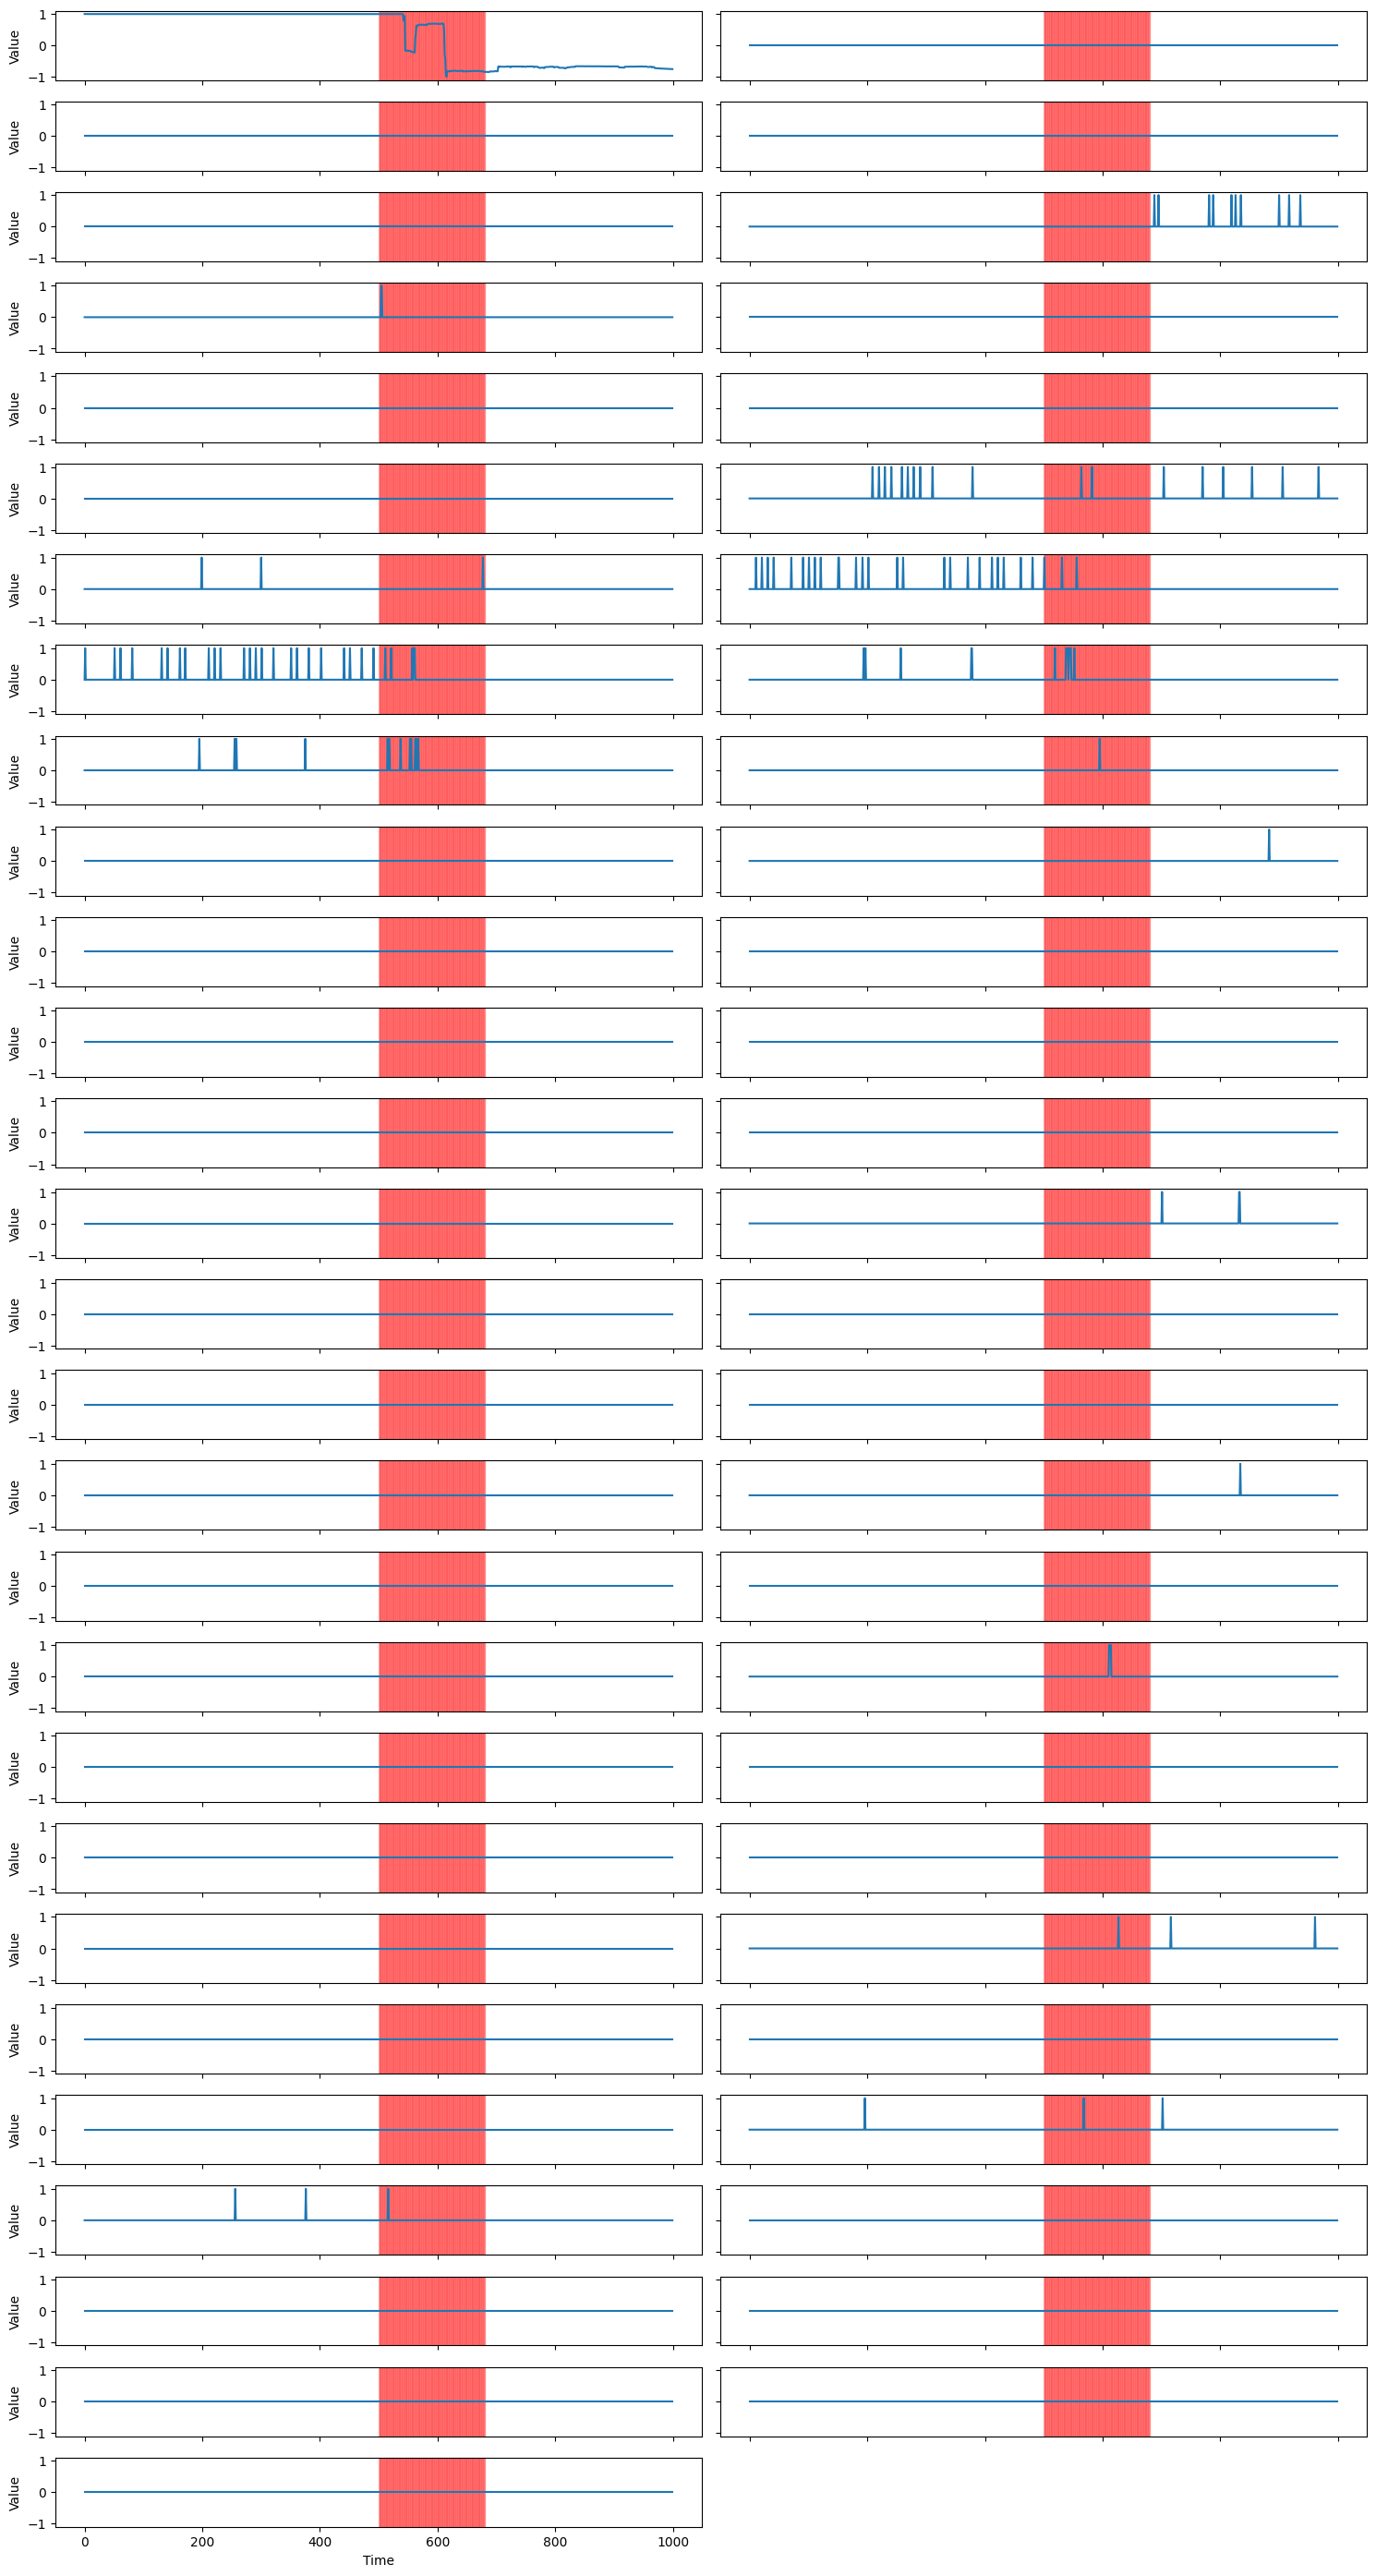

In [47]:
for data_path in data_paths:
    if os.path.exists(data_path):
        print(f"Plotting data from: {data_path}")
        plot_mts(data_path)
    else:
        print(f"Data file not found: {data_path}")